In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
sns.set()

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [46]:
# loading the data
file_path = 'data/'
# file_path = '/kaggle/input/digit-recognizer'
train = pd.read_csv(file_path+'train.csv')
test = pd.read_csv(file_path+'test.csv')

In [64]:
# converting pandas df to numpy array 
Y_train = train['label'].to_numpy()
X_train = train.drop(['label'],axis=1).to_numpy()

In [65]:
# current X_train is in shape of 42000, 784
print('Shape of X_train : ',X_train.shape)

# Just for preview we will convert it to 42000, 28, 28,
# as the actual pixel is 28x28
preview_train = X_train.reshape(42000,28,28)
print('Shape of preview_train : ',preview_train.shape)

Shape of X_train :  (42000, 784)
Shape of preview_train :  (42000, 28, 28)


#### Let's plot first 25 Images and corresponding label, just to make sure if we have the data in right order

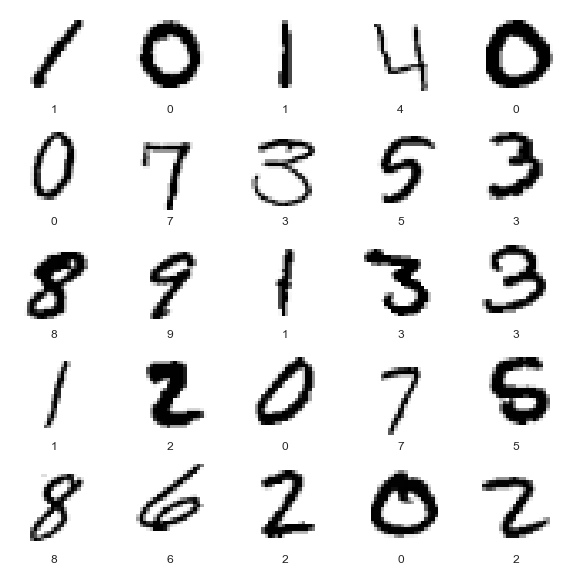

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preview_train[i], cmap=plt.cm.binary)
    plt.xlabel(Y_train[i])
plt.show()

#### Let's split Train, Test and Validation data in 80:10:10

**Validation data** is not used for testing or used for training. It's used to validate the accuracy of your model in each epoch and help us tuning the hyperparameter

In [66]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [67]:
X_train = X_train.reshape(42000,28,28,1)
# Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=None, dtype='float32')

In [68]:
# taking 80% as train data 
x_train, x_test1, y_train, y_test1 = train_test_split(X_train, Y_train ,test_size=0.2, random_state=42)

# from 20% data, splitting 50% as test data and 50% as validation data
x_test, x_val, y_test, y_val = train_test_split(x_test1, y_test1 ,test_size=0.5, random_state=42)

print('Training data set size :', y_train.shape[0])
print('Test data set size :', y_test.shape[0])
print('Vlidation data set size :', y_val.shape[0])

Training data set size : 33600
Test data set size : 4200
Vlidation data set size : 4200


### Model Training 

In [83]:
# Created as a function so that we can try the same model with different number of epochs

def TrainKerasModel(n):
    
    
    model = tf.keras.Sequential() # creating model
    
    # CNN layers
    model.add(tf.keras.layers.Conv2D( 16, (3, 3), activation='relu',
                 input_shape = (28, 28, 1)))
    model.add(tf.keras.layers.MaxPool2D((2,2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2,2)))
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu'))
    
    # neural network Layers
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu')) # first layer with 128 nodes
    model.add(tf.keras.layers.Dense(10)) # output layer with 10 nodes

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy']) 

    # model is training and summary is stored in history 
    history = model.fit(x_train, y_train, epochs=n, validation_data=((x_val,y_val))) 

    # fetching model accuracy and loss with train parameters 
    test_loss, test_acc = model.evaluate(x_train,  y_train, verbose=2)
    print('\nTest accuracy:', test_acc)
    return history, model



In [84]:
history, model = TrainKerasModel(4)

Train on 33600 samples, validate on 4200 samples
Epoch 1/4
33600/33600 [==============================] - 96s 3ms/sample - loss: 0.1705 - accuracy: 0.9482 - val_loss: 0.0457 - val_accuracy: 0.9838
Epoch 2/4
33600/33600 [==============================] - 94s 3ms/sample - loss: 0.0513 - accuracy: 0.9835 - val_loss: 0.0516 - val_accuracy: 0.9812
Epoch 3/4
33600/33600 [==============================] - 91s 3ms/sample - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0553 - val_accuracy: 0.9836
Epoch 4/4
33600/33600 [==============================] - 95s 3ms/sample - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0527 - val_accuracy: 0.9855
33600/1 - 43s - loss: 0.0184 - accuracy: 0.9913

Test accuracy: 0.99133927


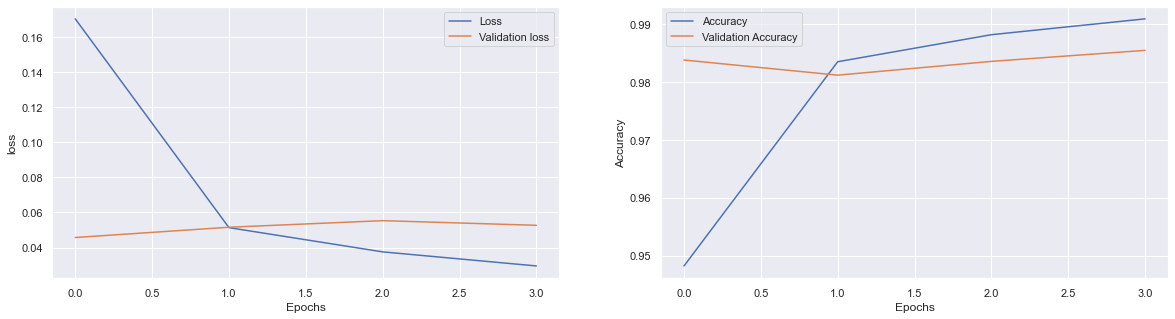

In [85]:
# plotting validation loss/Accuracy vs training loss/accuracy
def plotGraph():
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    plt.plot(history.history['loss'], label="Loss")
    plt.plot(history.history['val_loss'], label="Validation loss")
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()


    plt.subplot(122)
    plt.plot(history.history['accuracy'], label="Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plotGraph()

Let's Try giving 50 Epochs, and see for results and we'll take the best number of epochs from there

In [11]:
history, model = TrainKerasModel(50)

Train on 33600 samples, validate on 4200 samples
Epoch 1/50
33600/33600 [==============================] - 5s 146us/sample - loss: 0.2817 - accuracy: 0.9194 - val_loss: 0.1760 - val_accuracy: 0.9471
Epoch 2/50
33600/33600 [==============================] - 4s 131us/sample - loss: 0.1147 - accuracy: 0.9665 - val_loss: 0.1456 - val_accuracy: 0.9581
Epoch 3/50
33600/33600 [==============================] - 5s 149us/sample - loss: 0.0701 - accuracy: 0.9781 - val_loss: 0.1275 - val_accuracy: 0.9612
Epoch 4/50
33600/33600 [==============================] - 7s 196us/sample - loss: 0.0515 - accuracy: 0.9847 - val_loss: 0.1151 - val_accuracy: 0.9648
Epoch 5/50
33600/33600 [==============================] - 6s 181us/sample - loss: 0.0342 - accuracy: 0.9894 - val_loss: 0.1515 - val_accuracy: 0.9621
Epoch 6/50
33600/33600 [==============================] - 7s 205us/sample - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.1657 - val_accuracy: 0.9624
Epoch 7/50
33600/33600 [===========================

In [86]:
y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)

np.round(accuracy_score(y_test,y_pred),2)

0.99

In [87]:
final_test = test.to_numpy()
final_test = scaler.transform(final_test)
final_test = final_test.reshape(28000,28,28,1)
final_label = model.predict(final_test)
final_label = final_label.argmax(axis=-1)


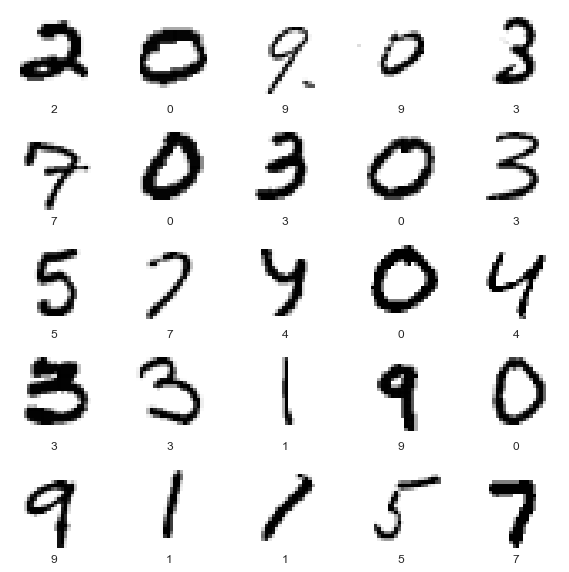

In [88]:
preview_test = test.to_numpy()
preview_test = preview_test.reshape(28000,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(preview_test[i], cmap=plt.cm.binary)
    plt.xlabel(final_label[i])
plt.show()

In [76]:
final_test.shape

(28000, 784)